# Major tasks

## Regression

  * y: continuous
  * output activation = identity: h(a) = a
  * loss = 0.5 SSE



## Binary Classification

  * y: either 0 or 1
  * output activation = sigmoid
  * loss = cross-entropy 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls ./drive/MyDrive/2021/ANN/w13App

ANN_aux.py  code  data	__pycache__


In [3]:
import sys
sys.path.append("./drive/MyDrive/2021/ANN/w13App") # my path

In [4]:
# For beautiful math display
from IPython.display import Math

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [5]:
import numpy as np
from matplotlib import pyplot as plt

#from DrawANN03 import *

In [6]:
from ANN_aux import *

### XOR Revisited

In [11]:
# XOR

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

for i in range(4):
    print("{} {} | {}".format( *X[i],  *Y[i]))


0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 0


In [ ]:
Math(r'x \in \mathbb{R}^2 \mapsto y \in \mathbb{R}^1')

<IPython.core.display.Math object>

In [7]:
def identity(a):
    return a

def mlp2(c, v, b, w, X, oact=identity):

    a = b.T + np.dot(X, w.T)            # a: array N x M
    z = sigmoid(a)                      # z: array N x M

    a2 = c.T + np.dot(z, v.T)           # a2: array N x K
    yhat = oact(a2)                     # yhat: array N x K

    return yhat


In [8]:
def mse_loss(x, y, yp):

    return np.mean((yp - y)**2)

In [9]:
def train_mlp2(c, v, b, w, X, Y, lr1, lr2, nepochs, 
               oact=identity, loss=mse_loss, disp=False):

  losses = []

  for i in range(nepochs):

      # Forward pass
      a = b.T + np.dot(X, w.T)            # a: array N x M
      z = sigmoid(a)                      # z: array N x M
      a2 = c.T + np.dot(z, v.T)           # a2: array N x K
      z2 = oact(a2)                       # z2: array N x K
      yhat = z2                           # yhat: array N x K

      # Backward pass
      delta2 = yhat - Y                   # delta2: array N x K
      OneVec = np.ones(N).reshape((1,-1)) # OneVec: array 1 x N
      dLc = np.dot( OneVec, delta2 ).T    # dLc: array K x 1
      dLv = np.dot( z.T, delta2 ).T       # dLv: array K x M
      H = np.multiply(1 - z, z)           # H: array N x M
      delta1 = np.dot(delta2, v) * H      # delta1: array N x M
      dLb = np.dot( OneVec, delta1 ).T    # dLb: array M x 1
      dLw = np.dot( X.T, delta1 ).T       # dLw: array M x D

      lossi = loss(X, Y, yhat)
      
      if np.isnan(lossi):  
          print('Reach NaN. Terminated.')
          break

      losses.append(lossi)

      c -= dLc * lr2
      v -= dLv * lr2
      b -= dLb * lr1
      w -= dLw * lr1

      if disp:
        if i % 5000 == 0:
            print('mse = %.4f' % mse)

  # end for i

  return c, v, b, w, losses

Time spent: 0.5002899169921875
Training
MSE =  2.8996801242694223e-30
RMSE =  1.7028447152542777e-15
0 0 | 0 | 0.0000
0 1 | 1 | 1.0000
1 0 | 1 | 1.0000
1 1 | 0 | 0.0000
The weights are:
c =  [[-0.77375895]]
v =  [[2.53583525 2.66314284]]
b =  [[-1.44359317]
 [-2.10425474]]
w =  [[ 2.23287978 -2.51416823]
 [-2.37316483  2.71533985]]


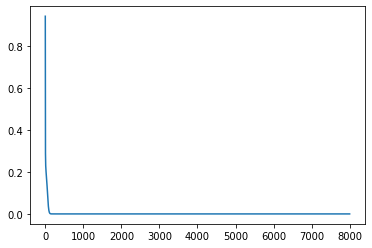

In [12]:
N, D = X.shape
_, K = Y.shape
M = 2

c = np.random.normal(0, 1, K).reshape((K,1))
v = np.random.normal(0, 1, K*M).reshape((K,M))
b = np.random.normal(0, 2, M).reshape((M,1))
w = np.random.normal(0, 2, M*D).reshape((M,D))

t1 = time.time()

cc, vv, bb, ww, train_loss = train_mlp2(c, v, b, w, X, Y, 0.3, 0.3, 8000, 
                                        identity, mse_loss)
plt.plot(train_loss)

t2 = time.time()

print('Time spent:', t2 - t1)

Yp = mlp2r(cc, vv, bb, ww, X)
print('Training')
print('MSE = ', mse_loss(X, Y, Yp))
print('RMSE = ', np.sqrt(mse_loss(X, Y, Yp)))

for i in range(4):
    print("{} {} | {} | {:.4f}".format( *X[i],  *Y[i], *Yp[i]))

print('The weights are:')
print('c = ', c)
print('v = ', v)
print('b = ', b)
print('w = ', w)


Let's check it by hand

![MLP for XOR](https://github.com/tatpongkatanyukul/ANN/raw/main/ann/MLPxorBlank.png)

Caution! ```w``` is M x D.

### Regression ANN on XOR

To learn how well regression ANN in general, we repeat this for 40 times and we will see how many times we can achieve an effective model.

In [ ]:
Nrepeats = 40
cutoff = 0.2

N, D = X.shape
_, K = Y.shape
M = 2

records = []
success = 0

for rep in range(Nrepeats):

  rr = {}
  c = np.random.normal(0, 1, K).reshape((K,1))
  v = np.random.normal(0, 1, K*M).reshape((K,M))
  b = np.random.normal(0, 2, M).reshape((M,1))
  w = np.random.normal(0, 2, M*D).reshape((M,D))

  t1 = time.time()

  cc, vv, bb, ww, train_loss = train_mlp2(c, v, b, w, X, Y, 0.3, 0.3, 8000, 
                                          identity, mse_loss)
  t2 = time.time()
  rr['time'] = t2 - t1
  rr['train_loss'] = train_loss
  rr['c'] = cc
  rr['v'] = vv
  rr['b'] = bb
  rr['w'] = ww

  Yp = mlp2(cc, vv, bb, ww, X, identity)
  # for i in range(4):
  #     print("repeat {}: {} {} | {} | {:.4f}".format(rep, *X[i],  *Y[i], *Yp[i]))
  #     print()
  SSE = np.sum( (Yp - Y)**2 )
  if SSE < cutoff:
    success += 1
  print('repeat {}: Yp = {:.1f} {:.1f} {:.1f} {:.1f}; SSE = {}'.format(rep, *Yp.T[0], SSE))
  

print('success = {} out of {}'.format(success, Nrepeats))  

repeat 0: Yp = -0.7 0.1 0.2 -0.7; SSE = 2.4477076727449765
repeat 1: Yp = 0.0 1.0 1.0 -0.0; SSE = 2.1200636827814692e-30
repeat 2: Yp = 0.0 1.0 0.5 0.5; SSE = 0.5015930614029251
repeat 3: Yp = 0.0 1.0 1.0 0.0; SSE = 4.147485513006046e-27
repeat 4: Yp = 0.0 0.5 1.0 0.5; SSE = 0.5016151581976438
repeat 5: Yp = 0.0 1.0 1.0 0.0; SSE = 3.3706116802990166e-13
repeat 6: Yp = 0.0 1.0 1.0 0.0; SSE = 1.4155966202618027e-10
repeat 7: Yp = 0.0 1.0 1.0 -0.0; SSE = 8.011868568650901e-30
repeat 8: Yp = -0.1 0.9 0.4 0.4; SSE = 0.5326004849866348
repeat 9: Yp = -0.0 1.0 1.0 -0.0; SSE = 4.53378083753146e-27
repeat 10: Yp = 0.4 0.3 1.0 0.4; SSE = 0.7056012108592308
repeat 11: Yp = -0.0 1.0 1.0 -0.0; SSE = 7.530330615771694e-27
repeat 12: Yp = -0.0 1.0 1.0 -0.0; SSE = 5.240370545417042e-09
repeat 13: Yp = -0.0 1.0 1.0 -0.0; SSE = 2.7541808932772287e-26
repeat 14: Yp = 0.0 1.0 1.0 0.0; SSE = 4.5579397027538536e-27
repeat 15: Yp = -0.0 1.0 1.0 -0.0; SSE = 5.055365807302278e-27
repeat 16: Yp = -0.0 1.0 1.0 -

### BUT it will be much easier to train a network for binary classification

Note: general approach to tackle difficult machine learning tasks

*   Learn nature of the task and use them to our advantages
  *   Regulate
  *   Provide clues




Key mechanism

1. output activation is sigmoid

2. cross-entropy loss

In [ ]:
# Regression output activation: identity

Math(r'f(w, x) = c + \sum_j v_j \cdot h\left(b_j + \sum_i w_{ji} x_i\right)')

<IPython.core.display.Math object>

In [ ]:
# Binary Classification: sigmoid

Math(r'f(w, x) = \sigma( c + \sum_j v_j \cdot h\left(b_j + \sum_i w_{ji} x_i\right) )')

<IPython.core.display.Math object>

In [ ]:
Math(r'\sigma(a) = \frac{1}{1 + \exp(-a)}')

<IPython.core.display.Math object>

In [ ]:
# Regression loss: mean squared error

Math(r'\mathcal{L} = \frac{1}{2} \sum_n \left(y_n - t_n\right)^2')

<IPython.core.display.Math object>

In [ ]:
# Binary Classification: cross-entroy loss

Math(r'\mathcal{L} = \sum_n \mathcal{L}_n')

<IPython.core.display.Math object>

In [ ]:
Math(r'$$ \mathcal{L}_n = - y_n \log(\hat{y}_n) - (1 - y_n) \log (1 - \hat{y}_n) $$')

<IPython.core.display.Math object>

In [ ]:
-np.log(0.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


inf

In [ ]:
np.log(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

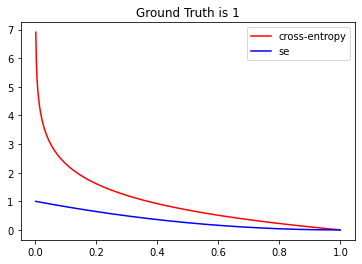

In [ ]:
ys = np.linspace(0.001, 0.999, 500)
plt.plot(ys, -np.log(ys), 'r')
plt.plot(ys, (ys - 1)**2, 'b')
plt.title('Ground Truth is 1')
#plt.plot(xs, -np.log(1 - ys), 'b')
plt.legend(['cross-entropy', 'se'])


Text(0.5, 1.0, 'Ground Truth is 0')

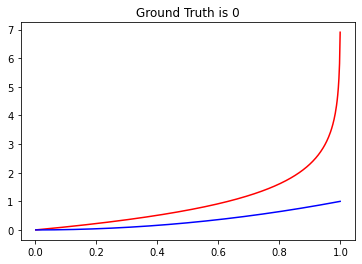

In [ ]:
ys = np.linspace(0.001, 0.999, 500)
plt.plot(ys, -np.log(1 - ys), 'r')
plt.plot(ys, (ys - 0)**2, 'b')

plt.title('Ground Truth is 0')

Implementation

In [ ]:
Y

array([[0],
       [1],
       [1],
       [0]])

In [ ]:
# test
Yp = np.array([[0.0002], [0.99999], [0.000001], [0.998]])

In [ ]:
Y == 1

array([[False],
       [ True],
       [ True],
       [False]])

In [ ]:
Yp[Y==1]

array([9.9999e-01, 1.0000e-06])

In [ ]:
Yp[Y==0]

array([2.00e-04, 9.98e-01])

In [ ]:
np.sum(-np.log(Yp[Y == 1])) ## Only the tn == 1 part

13.815520558014274

### Cross-entropy loss

In [ ]:
def naive_cross_entropy(x, y, yp):
    
    return np.sum(- y * np.log(yp)) + np.sum(-(1 - y) * np.log(1-yp))

In [ ]:
Yt = np.array([1, 0])
Ytp = np.array([1, 0])
naive_cross_entropy(None, Yt, Ytp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


nan

In [ ]:
def cross_entropy(x, y, yp):
    
    return np.sum(-np.log(yp[y == 1]))+np.sum(-np.log(1-yp[y == 0]))

In [ ]:
Yt = np.array([1, 0])
Ytp = np.array([1, 0])
cross_entropy(None, Yt, Ytp)

0.0

In [ ]:
cross_entropy(X, Y, Yp)

20.030328676439133

In [ ]:
# If you do it right, you will get ~20.0303

### XOR Revisited by binary classification

*   Use ```sigmoid``` instead of ```identity```
*   Use ```cross_entropy``` instead of ```mse_loss```



In [ ]:
print('Given')
printmd(r'$$ y \in \{0, 1\}, $$')
printmd(r'$$\hat{y} = \mathrm{sigmoid}(a), $$')
printmd(r'$$L = - y \log(\hat{y}) - (1 - y) \log(1 - \hat{y}), $$')
print('then')
printmd(r'$$ \frac{\partial L}{\partial a} = \hat{y} - y, $$')


Given


$$ y \in \{0, 1\}, $$

$$\hat{y} = \mathrm{sigmoid}(a), $$

$$L = - y \log(\hat{y}) - (1 - y) \log(1 - \hat{y}), $$

then


$$ \frac{\partial L}{\partial a} = \hat{y} - y, $$

#### Train

Notice **the number of epochs** used.

Try out various numbers of epochs c.f. regression.

Time spent: 0.15598797798156738
Training
Loss = 0.01733566095803374
MSE =  1.894087611505673e-05
RMSE =  0.004352111684579881
0 0 | 0 | 0.0051
0 1 | 1 | 0.9961
1 0 | 1 | 0.9961
1 1 | 0 | 0.0044
The weights are:
c =  [[-5.864554]]
v =  [[11.9159828  11.96288854]]
b =  [[-3.77229289]
 [-3.60003054]]
w =  [[-7.10034477  6.89663172]
 [ 6.62131251 -6.93295424]]


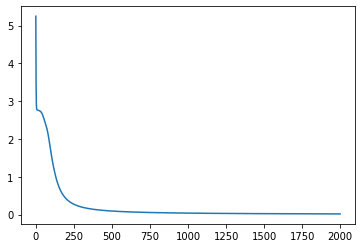

In [ ]:
N, D = X.shape
_, K = Y.shape
M = 2

c = np.random.normal(0, 1, K).reshape((K,1))
v = np.random.normal(0, 1, K*M).reshape((K,M))
b = np.random.normal(0, 2, M).reshape((M,1))
w = np.random.normal(0, 2, M*D).reshape((M,D))

t1 = time.time()

cc, vv, bb, ww, train_loss = train_mlp2(c, v, b, w, X, Y, 0.3, 0.3, 2000, 
                                        sigmoid, cross_entropy)
plt.plot(train_loss)

t2 = time.time()

print('Time spent:', t2 - t1)

Yp = mlp2(cc, vv, bb, ww, X, sigmoid)
print('Training')
print('Loss =', cross_entropy(X, Y, Yp))
print('MSE = ', mse_loss(X, Y, Yp))
print('RMSE = ', np.sqrt(mse_loss(X, Y, Yp)))

for i in range(4):
    print("{} {} | {} | {:.4f}".format( *X[i],  *Y[i], *Yp[i]))

print('The weights are:')
print('c = ', c)
print('v = ', v)
print('b = ', b)
print('w = ', w)

Note: this example might not be able to show the benefits of using binary classification over regression in this case.

But, using a settings appropriate to the task is more effective.

### XOR as regression vs as binary classification

In [ ]:
Nrepeats = 40
cutoff = 0.2

N, D = X.shape
_, K = Y.shape
M = 2

records = []
success = 0

for rep in range(Nrepeats):

  rr = {}
  c = np.random.normal(0, 1, K).reshape((K,1))
  v = np.random.normal(0, 1, K*M).reshape((K,M))
  b = np.random.normal(0, 2, M).reshape((M,1))
  w = np.random.normal(0, 2, M*D).reshape((M,D))

  t1 = time.time()

  cc, vv, bb, ww, train_loss = train_mlp2(c, v, b, w, X, Y, 0.3, 0.3, 8000, 
                                          sigmoid, cross_entropy)
  t2 = time.time()
  rr['time'] = t2 - t1
  rr['train_loss'] = train_loss
  rr['c'] = cc
  rr['v'] = vv
  rr['b'] = bb
  rr['w'] = ww

  Yp = mlp2(cc, vv, bb, ww, X, sigmoid)
  # for i in range(4):
  #     print("repeat {}: {} {} | {} | {:.4f}".format(rep, *X[i],  *Y[i], *Yp[i]))
  #     print()
  SSE = np.sum( (Yp - Y)**2 )
  if SSE < cutoff:
    success += 1
  print('repeat {}: Yp = {:.1f} {:.1f} {:.1f} {:.1f}; SSE = {}'.format(rep, *Yp.T[0], SSE))
  

print('success = {} out of {}'.format(success, Nrepeats))  

repeat 0: Yp = 0.0 1.0 0.5 0.5; SSE = 0.5005476641475484
repeat 1: Yp = 0.0 1.0 0.5 0.5; SSE = 0.5005963224572337
repeat 2: Yp = 0.0 1.0 1.0 0.0; SSE = 4.044853477398342e-06
repeat 3: Yp = 0.0 1.0 1.0 0.0; SSE = 3.981825904242507e-06
repeat 4: Yp = 0.0 1.0 1.0 0.0; SSE = 2.3557431079213082e-05
repeat 5: Yp = 0.0 1.0 1.0 0.0; SSE = 4.107543754686287e-06
repeat 6: Yp = 0.0 1.0 1.0 0.0; SSE = 4.03952751306458e-06
repeat 7: Yp = 0.0 1.0 1.0 0.0; SSE = 4.122858837959618e-06
repeat 8: Yp = 0.0 0.7 0.7 0.7; SSE = 0.6675701420030029
repeat 9: Yp = 0.0 1.0 1.0 0.0; SSE = 3.903660580105269e-06
repeat 10: Yp = 0.0 1.0 1.0 0.0; SSE = 4.285134326929974e-06
repeat 11: Yp = 0.0 1.0 0.5 0.5; SSE = 0.5005470900165734
repeat 12: Yp = 0.0 1.0 1.0 0.0; SSE = 4.1467480765099375e-06
repeat 13: Yp = 0.0 1.0 1.0 0.0; SSE = 4.169627175266232e-06
repeat 14: Yp = 0.0 1.0 0.5 0.5; SSE = 0.5005674983859313
repeat 15: Yp = 0.0 0.5 1.0 0.5; SSE = 0.5005454718626132
repeat 16: Yp = 0.0 1.0 1.0 0.0; SSE = 4.2291491245

Ah!!! It is what it is.

Regression wins as the results show.

But, does regression really outperform binary classification in binary setting? Or is it just a fluke?

Note:
this is interesting. There might be something I can elaborate on. But, later! (or never... who knows!)

### Significance test

In [ ]:
# Later

## Multiclass Classification

Key Mechanism

1. One-hot coding

2. Softmax

3. Multiclass cross entropy loss

In [ ]:
Math(r'\mathbf{\hat{y}} = \mathrm{softmax}( \mathbf{c}^T + \mathbf{z} \cdot \mathbf{v}^T )')

<IPython.core.display.Math object>

In [ ]:
printmd(r'$$\mathrm{softmax}(\mathbf{a}[n]) = [\mathrm{softmax}(a_1[n]), \ldots, \mathrm{softmax}(a_K)[n]]$$')
printmd(r'$$\mathrm{softmax}(a_k) = \frac{\exp(a_k)}{\sum_{i=1}^K \exp(a_i)}$$')

$$\mathrm{softmax}(\mathbf{a}[n]) = [\mathrm{softmax}(a_1[n]), \ldots, \mathrm{softmax}(a_K)[n]]$$

$$\mathrm{softmax}(a_k) = \frac{\exp(a_k)}{\sum_{i=1}^K \exp(a_i)}$$

In [ ]:
Math(r'\mathcal{L}_n = - \sum_k y_k[n] \cdot \log (\hat{y}_k[n]) ')

<IPython.core.display.Math object>

### Iris Dataset Revisited

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
X,y = iris.data, iris.target
Y = y.reshape((-1,1))

In [ ]:
print(X.shape)
print(Y.shape)

(150, 4)
(150, 1)


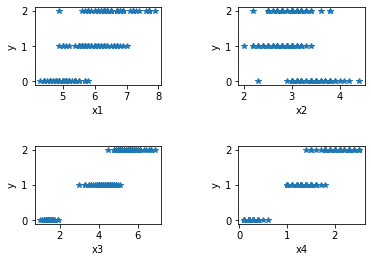

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(rect=[0.1, 0.1, 1, 1], h_pad=4, w_pad=4)

for i in range(4):
  plt.subplot(2,2,i+1)
  plt.plot( X[:,i], Y[:,0], '*')
  plt.xlabel('x'+str(i+1))
  plt.ylabel('y')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(105, 4)
(45, 4)
(105, 1)
(45, 1)


#### One-hot coding

In [ ]:
# Turn Y_train into one-hot coding

def onehot(y, classes=None):
  '''
  input y: N x 1
  classes: unique values of y, e.g., [0, 1, 2]
  output yhot: N x K
  '''

  if classes is None:
    classes = np.unique(y)

  K = len(classes)
  N = y.shape[0]
  codebook = np.diag(np.ones(K))

  yhot = codebook[y[:,0]]

  return yhot

In [ ]:
# Test onehot code
print(Y_train[:10,:].T)
onehot(Y_train[:10,:])

[[1 1 0 2 1 2 0 0 0 2]]


array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

#### Prepare one-hot output

In [ ]:
Yonehot_train = onehot(Y_train)
Yonehot_train[:5,:]

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

#### Softmax

In [ ]:
printmd(r'$$ \mathrm{softmax}(a_k) = \frac{ \exp(a_k)}{\sum_j \exp(a_j)} $$')

$$ \mathrm{softmax}(a_k) = \frac{ \exp(a_k)}{\sum_j \exp(a_j)} $$

In [ ]:
printmd(r'$$ \mathbf{z} = h(\mathbf{a}) = [h(a_1), h(a_2), \ldots, h(a_K)]^T $$')


$$ \mathbf{z} = h(\mathbf{a}) = [h(a_1), h(a_2), \ldots, h(a_K)]^T $$

In [ ]:
def naive_softmax(a):
  '''
  a: N x K
  '''
  ea = np.exp(a)
  s = np.sum(ea, axis=1, keepdims=True)
  z = ea/s
  return z

In [ ]:
# Test

xs = np.array([[1, 2, 3], [7, 8, 9], [30, 10, 20], [200, 300, 100], [400, 600, 200]])
yhh = naive_softmax(xs)
print(yhh)
print(np.argmax(yhh, axis=1))

[[9.00305732e-002 2.44728471e-001 6.65240956e-001]
 [9.00305732e-002 2.44728471e-001 6.65240956e-001]
 [9.99954600e-001 2.06106005e-009 4.53978686e-005]
 [3.72007598e-044 1.00000000e+000 1.38389653e-087]
 [1.38389653e-087 1.00000000e+000 1.91516960e-174]]
[2 2 0 1 1]


In [ ]:
np.exp(np.array([1, 2, 3]))/np.sum(np.exp(np.array([1, 2, 3])))

array([0.09003057, 0.24472847, 0.66524096])

In [ ]:
np.exp(np.array([7, 8, 9]))/np.sum(np.exp(np.array([7, 8, 9])))

array([0.09003057, 0.24472847, 0.66524096])

In [ ]:
np.exp(np.array([100, 101, 102]))/np.sum(np.exp(np.array([100, 101, 102])))

array([0.09003057, 0.24472847, 0.66524096])

Do you notice something here?

PAUSE! PAUSE! PAUSE!

Then what's wrong with ```naive_softmax```?

In [ ]:
xs = np.array([[7,8,9], [70, 80, 90], [30, 10, 20], [200, 300, 100]])
yhh = naive_softmax(xs)
print(yhh)
print(np.argmax(yhh, axis=1))

[[9.00305732e-02 2.44728471e-01 6.65240956e-01]
 [2.06106005e-09 4.53978686e-05 9.99954600e-01]
 [9.99954600e-01 2.06106005e-09 4.53978686e-05]
 [3.72007598e-44 1.00000000e+00 1.38389653e-87]]
[2 2 0 1]


In [ ]:
xs = np.array([[700,800,900], [70, 80, 90], [30, 10, 20], [200, 300, 100]])
yhh = naive_softmax(xs)
print(yhh)
print(np.argmax(yhh, axis=1))

[[0.00000000e+00            nan            nan]
 [2.06106005e-09 4.53978686e-05 9.99954600e-01]
 [9.99954600e-01 2.06106005e-09 4.53978686e-05]
 [3.72007598e-44 1.00000000e+00 1.38389653e-87]]
[1 2 0 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


What happens?

In [ ]:
print(np.exp(700))
print(np.exp(701))
print(np.exp(702))
print(np.exp(703))
print(np.exp(709))
print(np.exp(710))

1.0142320547350045e+304
2.7569685642268427e+304
7.49421754977065e+304
2.037139538406043e+305
8.218407461554972e+307
inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


##### More robust softmax code

In [ ]:
printmd(r'$$ \mathrm{softmax}(a_k) = \frac{ \exp(a_k)}{\sum_j \exp(a_j)} = \frac{ \exp(a_k - a_{\max})}{\sum_j \exp(a_j - a_{\max})}$$')

$$ \mathrm{softmax}(a_k) = \frac{ \exp(a_k)}{\sum_j \exp(a_j)} = \frac{ \exp(a_k - a_{\max})}{\sum_j \exp(a_j - a_{\max})}$$

In [ ]:
def softmax(a):
  '''
  a: N x K
  '''
  amax = np.max(a, axis=1, keepdims=True)
  
  ea = np.exp(a - amax)

  s = np.sum(ea, axis=1, keepdims=True)
  z = ea/s
  return z

In [ ]:
softmax(np.array([[1,2,3], [10, 20, 30]]))

array([[9.00305732e-02, 2.44728471e-01, 6.65240956e-01],
       [2.06106005e-09, 4.53978686e-05, 9.99954600e-01]])

In [ ]:
# Test

xs = np.array([[1, 2, 3], [30, 10, 20], [200, 300, 100], [400, 600, 200]])
yhh = softmax(xs)
print(yhh)
print(np.argmax(yhh, axis=1))

[[9.00305732e-002 2.44728471e-001 6.65240956e-001]
 [9.99954600e-001 2.06106005e-009 4.53978686e-005]
 [3.72007598e-044 1.00000000e+000 1.38389653e-087]
 [1.38389653e-087 1.00000000e+000 1.91516960e-174]]
[2 0 1 1]


In [ ]:
xs = np.array([[1000, 2000, 3000], [30, 10, 20], [200, 300, 100], [400, 600, 200]])
yhh = softmax(xs)
print(yhh)
print(np.argmax(yhh, axis=1))

[[0.00000000e+000 0.00000000e+000 1.00000000e+000]
 [9.99954600e-001 2.06106005e-009 4.53978686e-005]
 [3.72007598e-044 1.00000000e+000 1.38389653e-087]
 [1.38389653e-087 1.00000000e+000 1.91516960e-174]]
[2 0 1 1]


#### Category cross-entropy loss

In [ ]:
def cc_entropy(x, yonehot, yp, eps=1e-323, do_sum=True):
    '''
    yonehot: N x K  (in one-hot coding)
    yp: N x K
    '''
    Ln = -np.log(np.sum(yonehot * yp, axis=1, keepdims=True) + eps)

    if do_sum:
      return np.sum(Ln)

    return Ln

In [ ]:
# Test
gthot = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0]])
yhat = np.array([[1, 0, 0],[1, 0, 0], [0, 0.1, 0.9], [0.99, 0.01, 0] ])

#print(cc_entropy(None, gthot, yhat, eps=0, do_sum=False))
print(cc_entropy(None, gthot, yhat, do_sum=False))
print(cc_entropy(None, gthot, yhat))

[[-0.00000000e+00]
 [ 7.43746925e+02]
 [ 1.05360516e-01]
 [ 4.60517019e+00]]
748.4574554424672


Notice that derivative of category cross-entropy loss w.r.t. output activation ```a``` is simply the difference.

In [ ]:
print('Given')
printmd(r'$$ \mathbf{y} \in \{0, 1\}^K, $$')
printmd(r'$$ \sum_k y_k = 1, $$')
printmd(r'$$\hat{y}_k = \mathrm{softmax}(a_k), $$')
printmd(r'$$L = - \sum_k y_k \log(\hat{y}_k), $$')
print('then')
printmd(r'$$ \frac{\partial L}{\partial a_k} = \hat{y}_k - y_k, $$')


Given


$$ \mathbf{y} \in \{0, 1\}^K, $$

$$ \sum_k y_k = 1, $$

$$\hat{y}_k = \mathrm{softmax}(a_k), $$

$$L = - \sum_k y_k \log(\hat{y}_k), $$

then


$$ \frac{\partial L}{\partial a_k} = \hat{y}_k - y_k, $$

#### Choose a model and train MLP with Iris data

Time spent: 0.5579009056091309


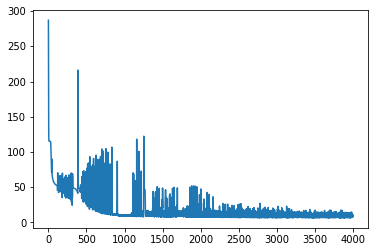

In [ ]:
N, D = X_train.shape
_, K = Yonehot_train.shape
M = 5

c = np.random.normal(0, 1, K).reshape((K,1))
v = np.random.normal(0, 1, K*M).reshape((K,M))
b = np.random.normal(0, 2, M).reshape((M,1))
w = np.random.normal(0, 2, M*D).reshape((M,D))

t1 = time.time()

cc, vv, bb, ww, train_loss = train_mlp2(c, v, b, w, X_train, Yonehot_train, 
                              0.02, 0.01, 4000, softmax, cc_entropy)
plt.plot(train_loss)

t2 = time.time()

print('Time spent:', t2 - t1)

In [ ]:
print('The weights are:')
print('c = ', c)
print('v = ', v)
print('b = ', b)
print('w = ', w)

The weights are:
c =  [[ 0.47639095]
 [-2.22962713]
 [-1.07736833]]
v =  [[ 1.04036656 -8.40355623  0.21915815 -1.38528669  5.3386721 ]
 [-1.40428421  5.44837895 -1.42510035  1.15056819  3.66764838]
 [-0.32986818  5.91423391  0.90934383 -0.75840937 -6.29589767]]
b =  [[ 1.07720768]
 [-3.37342252]
 [-0.74513121]
 [-0.58404385]
 [13.48651614]]
w =  [[  1.56032354   3.41065708   0.13814955  -1.3953771 ]
 [  1.05093662  -4.56344181   4.26077346  -0.03664908]
 [ -1.88949027  -0.77651644  -1.40361194   0.79234346]
 [ -1.13064823   1.18559775  -4.92423855  -0.79976081]
 [ 11.23479992   8.9299156  -16.6773357  -15.77031675]]


In [ ]:
Yp = mlp2(cc, vv, bb, ww, X_train, softmax)
print('Training')
print('Loss =', cross_entropy(X_train, Yonehot_train, Yp))

Training
Loss = 16.754093994711944


What!

What does this even mean?

In [ ]:
Ypclass = np.argmax(Yp, axis=1)
Ypclass

array([1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 2,
       2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0])

In [ ]:
Y_train.T

array([[1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2,
        2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0,
        2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
        2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
        2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0]])

In [ ]:
print(np.sum(Ypclass == Y_train[:,0]))
print(Y_train.shape)
print('Training accuracy', np.mean(Ypclass == Y_train[:,0]))

102
(105, 1)
Training accuracy 0.9714285714285714


For classification, it makes more sense to report a model performance using **accuracy** (rather than MSE).

#### Evaluation

Don't forget to properly test your model.

In [ ]:
Yp = mlp2(cc, vv, bb, ww, X_test, softmax)
print('Test')
Ypclass = np.argmax(Yp, axis=1)
Ypclass

Test


array([2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       1])

In [ ]:
Y_test.T

array([[2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
        1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2,
        1]])

In [ ]:
print(np.sum(Ypclass == Y_test[:,0]))
print(Y_test.shape)
print('Test accuracy', np.mean(Ypclass == Y_test[:,0]))

43
(45, 1)
Test accuracy 0.9555555555555556


# Normalization

## Let's learn Data 1

(200, 1)
(200, 1)


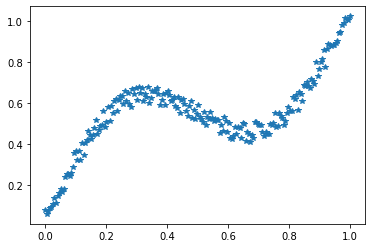

In [ ]:
xs, ys = gen_data(200)

print(xs.shape)
print(ys.shape)

plt.plot(xs, ys, '*')

In [ ]:
# Separate data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xs , ys, test_size=0.4, shuffle=True)


print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(120, 1)
(120, 1)
(80, 1)
(80, 1)


In [ ]:
import time

Time spent: 3.407820463180542
Training
MSE =  0.000819492571589909
RMSE =  0.028626780671076324
Testing
MSE =  0.0009375169015169294
RMSE =  0.03061889778416149
r2 = 0.9782275700508966


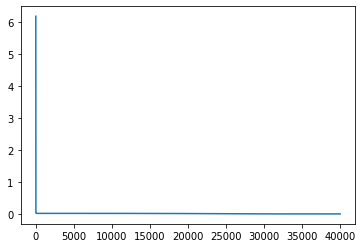

In [ ]:
N, D = X_train.shape
_, K = y_train.shape
M = 8 # number of HUs (hyper-parameter)

# Biases and weights (parameters)
c = np.random.normal(0, 1, K).reshape((K,1))
v = np.random.normal(0, 1, K*M).reshape((K,M))
b = np.random.normal(0, 2, M).reshape((M,1))
w = np.random.normal(0, 2, M*D).reshape((M,D))

lr1 = 0.3/N
lr2 = 0.3/N

t1 = time.time()

cc, vv, bb, ww, train_loss = train_mlp2(c, v, b, w, X_train, y_train, lr1, lr2,
                                        40000, identity, mse_loss)
plt.plot(train_loss)

t2 = time.time()

print('Time spent:', t2 - t1)

Yp = mlp2(cc, vv, bb, ww, X_train, identity)
print('Training')
print('MSE = ', mse_loss(X_train, y_train, Yp))
print('RMSE = ', np.sqrt(mse_loss(X_train, y_train, Yp)))

Yp = mlp2(cc, vv, bb, ww, X_test, identity)
print('Testing')
print('MSE = ', mse_loss(X_test, y_test, Yp))
print('RMSE = ', np.sqrt(mse_loss(X_test, y_test, Yp)))

# R Square
r2 = 1- np.sum( np.square(Yp - y_test) )/np.sum( np.square( np.mean(y_test) - y_test) )
print('r2 =', r2)

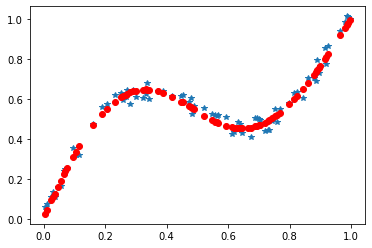

In [ ]:
yp = mlp2r(cc, vv, bb, ww, X_test)

plt.plot(X_test, y_test, '*')
plt.plot(X_test, yp, 'ro')

It works!!!

## Try again with Data 2

(200, 1)
(200, 1)


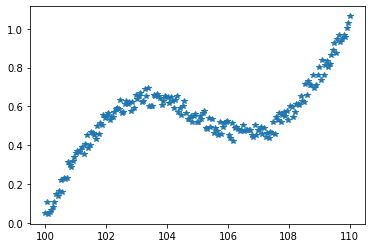

In [ ]:
xs, ys = gen_data2(200)

print(xs.shape)
print(ys.shape)

plt.plot(xs, ys, '*')

In [ ]:
# Separate data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xs , ys, test_size=0.4, shuffle=True)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(120, 1)
(120, 1)
(80, 1)
(80, 1)


Time spent: 3.4096784591674805
Training
MSE =  0.03439729401993507
RMSE =  0.18546507493308564
Testing
MSE =  0.033335369555154294
RMSE =  0.18257976217301383
r2 = -0.001996805255206846


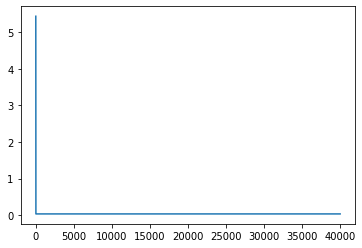

In [ ]:
N, D = X_train.shape
_, K = y_train.shape
M = 8

c = np.random.normal(0, 1, K).reshape((K,1))
v = np.random.normal(0, 1, K*M).reshape((K,M))
b = np.random.normal(0, 2, M).reshape((M,1))
w = np.random.normal(0, 2, M*D).reshape((M,D))

lr1 = 0.3/N
lr2 = 0.3/N

t1 = time.time()

cc, vv, bb, ww, train_loss = train_mlp2(c, v, b, w, X_train, y_train, lr1, lr2,
                                        40000, identity, mse_loss)
plt.plot(train_loss)

t2 = time.time()

print('Time spent:', t2 - t1)

Yp = mlp2(cc, vv, bb, ww, X_train, identity)
print('Training')
print('MSE = ', mse_loss(X_train, y_train, Yp))
print('RMSE = ', np.sqrt(mse_loss(X_train, y_train, Yp)))

Yp = mlp2(cc, vv, bb, ww, X_test, identity)
print('Testing')
print('MSE = ', mse_loss(X_test, y_test, Yp))
print('RMSE = ', np.sqrt(mse_loss(X_test, y_test, Yp)))

# R Square
r2 = 1- np.sum( np.square(Yp - y_test) )/np.sum( np.square( np.mean(y_test) - y_test) )
print('r2 =', r2)

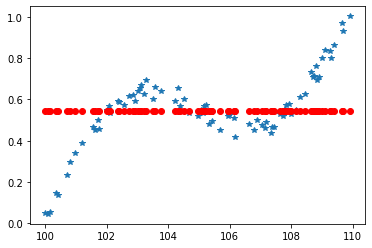

In [ ]:
yp = mlp2r(cc, vv, bb, ww, X_test)

plt.plot(X_test, y_test, '*')
plt.plot(X_test, yp, 'ro')

array([[2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [0],
       [2],
       [0],
       [0],
       [2],
       [2],
       [0],
       [2],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [1],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [2],
       [2],
       [1]])

In [ ]:
X_test.shape

(80, 1)

In [ ]:
X_test

array([[103.2160804 ],
       [105.9798995 ],
       [102.51256281],
       [109.39698492],
       [105.77889447],
       [106.93467337],
       [103.16582915],
       [104.22110553],
       [101.00502513],
       [101.10552764],
       [105.72864322],
       [103.36683417],
       [102.11055276],
       [102.81407035],
       [102.36180905],
       [104.87437186],
       [101.50753769],
       [100.05025126],
       [105.67839196],
       [103.71859296],
       [101.05527638],
       [104.57286432],
       [102.96482412],
       [100.15075377],
       [107.33668342],
       [109.24623116],
       [105.32663317],
       [103.81909548],
       [109.34673367],
       [106.23115578],
       [101.65829146],
       [107.38693467],
       [100.        ],
       [102.71356784],
       [104.3718593 ],
       [108.54271357],
       [108.94472362],
       [109.94974874],
       [106.48241206],
       [106.33165829],
       [108.29145729],
       [104.32160804],
       [104.47236181],
       [108

Pause! Pause! Pause!

<br>

<br>

What happens here?

Our model can ace the data 1.

But why cannot our model learn data 2?

<br>

<br>


## Input normalization

In [ ]:
mu = np.mean(X_train)
sigma = np.sqrt(np.var(X_train))

In [ ]:
print(mu)
print(sigma**2)

104.85762144053601
8.351149942902676


In [ ]:
# normalized input
xn_train = (X_train - mu)/sigma

In [ ]:
np.mean(xn_train)

2.0132044179869505e-15

In [ ]:
np.var(xn_train)

0.9999999999999999

Try again with INPUT NORMALIZATION

Time spent: 3.4750359058380127
Training
MSE =  0.0007614179948603981
RMSE =  0.027593803559139832


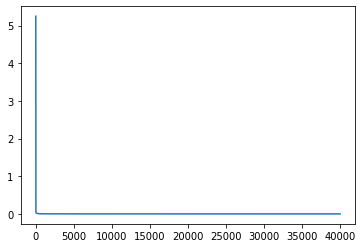

In [ ]:
N, D = X_train.shape
_, K = y_train.shape
M = 8

c = np.random.normal(0, 1, K).reshape((K,1))
v = np.random.normal(0, 1, K*M).reshape((K,M))
b = np.random.normal(0, 2, M).reshape((M,1))
w = np.random.normal(0, 2, M*D).reshape((M,D))

t1 = time.time()

cc, vv, bb, ww, train_loss = train_mlp2r(c, v, b, w, xn_train, y_train, 0.3, 40000, mse_loss)
plt.plot(train_loss)

t2 = time.time()

print('Time spent:', t2 - t1)

Yp = mlp2r(cc, vv, bb, ww, xn_train)
print('Training')
print('MSE = ', mse_loss(xn_train, y_train, Yp))
print('RMSE = ', np.sqrt(mse_loss(xn_train, y_train, Yp)))

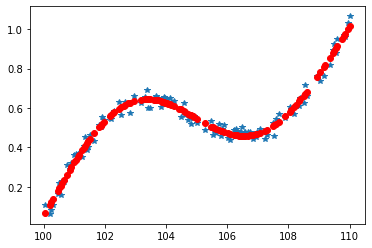

In [ ]:
plt.plot(X_train, y_train, '*')
plt.plot(X_train, Yp, 'ro')
plt.show()

Now, see the test

In [ ]:
Yp = mlp2r(cc, vv, bb, ww, X_test)
print('Testing')
print('MSE = ', mse_loss(X_test, y_test, Yp))
print('RMSE = ', np.sqrt(mse_loss(X_test, y_test, Yp)))

# R Square
r2 = 1- np.sum( np.square(Yp - y_test) )/np.sum( np.square( np.mean(y_test) - y_test) )
print('r2 =', r2)

Testing
MSE =  1.612330276809626
RMSE =  1.2697756797204875
r2 = -47.46353311627509


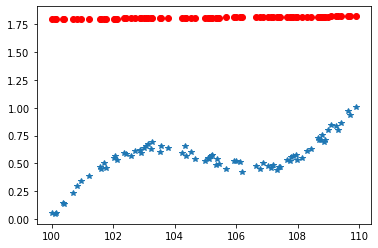

In [ ]:
plt.plot(X_test, y_test, '*')
plt.plot(X_test, Yp, 'ro')
plt.show()

WHAT!!!!

What's wrong!

Can you help me why this is not working?

<br>
<br>
PAUSE! PAUSE! PAUSE!
<br>
<br>

Testing
MSE =  0.0008227183304845402
RMSE =  0.028683066964404976
r2 = 0.9752706764685336


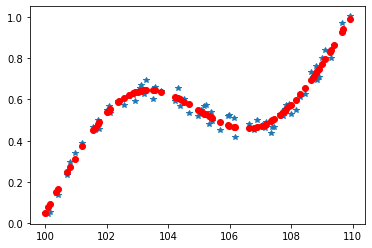

In [ ]:
xn_test = (X_test - mu)/sigma

Yp = mlp2r(cc, vv, bb, ww, xn_test)
print('Testing')
print('MSE = ', mse_loss(X_test, y_test, Yp))
print('RMSE = ', np.sqrt(mse_loss(X_test, y_test, Yp)))

# R Square
r2 = 1- np.sum( np.square(Yp - y_test) )/np.sum( np.square( np.mean(y_test) - y_test) )
print('r2 =', r2)

plt.plot(X_test, y_test, '*')
plt.plot(X_test, Yp, 'ro')

Remember!
When you normalize input,
don't forget to make it consistent in both training and test sets.

# Online-learning

In [14]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

print(X.shape)
print(Y.shape)

N, D = X.shape
_, K = Y.shape
M = 8 # number of HUs (hyper-parameter)

(4, 2)
(4, 1)


In [15]:
lr1 = 0.3
lr2 = 0.3

# Biases and weights (parameters)
c = np.random.normal(0, 1, K).reshape((K,1))
v = np.random.normal(0, 1, K*M).reshape((K,M))
b = np.random.normal(0, 2, M).reshape((M,1))
w = np.random.normal(0, 2, M*D).reshape((M,D))

print(c.shape)
print(v.shape)

(1, 1)
(1, 8)


In [16]:
nepochs = 8000

oact=identity
loss=mse_loss
disp=False

In [17]:
X[0,:].shape

(2,)

In [18]:
#def train_mlp2(c, v, b, w, X, Y, lr1, lr2, nepochs, 
#               oact=identity, loss=mse_loss, disp=False):

if True:

  losses = []

  for i in range(nepochs):

      # X: N x D
      for n in range(N):

        xn = X[n,:].reshape((1,-1))
        yn = Y[n,:].reshape((1,-1))

        # Forward pass
        a = b.T + np.dot(xn, w.T)            # a: array N x M   ## Online
        z = sigmoid(a)                      # z: array N x M
        a2 = c.T + np.dot(z, v.T)           # a2: array N x K
        z2 = oact(a2)                       # z2: array N x K
        yhat = z2                           # yhat: array N x K

        # Backward pass
        delta2 = yhat - yn                   # delta2: array N x K  ## Online
        OneVec = np.ones(1).reshape((1,-1)) # OneVec: array 1 x 1   ## Online
        dLc = np.dot( OneVec, delta2 ).T    # dLc: array K x 1
        dLv = np.dot( z.T, delta2 ).T       # dLv: array K x M
        H = np.multiply(1 - z, z)           # H: array N x M
        delta1 = np.dot(delta2, v) * H      # delta1: array N x M
        dLb = np.dot( OneVec, delta1 ).T    # dLb: array M x 1
        dLw = np.dot( xn.T, delta1 ).T       # dLw: array M x D   ## Online

        lossi = loss(xn, yn, yhat)           ## Online
        
        if np.isnan(lossi):  
            print('Reach NaN. Terminated.')
            break

        losses.append(lossi)

        c -= dLc * lr2
        v -= dLv * lr2
        b -= dLb * lr1
        w -= dLw * lr1
      # end for n
      
      if disp:
        if i % 1000 == 0:
            print('mse = %.4f' % mse)

  # end for i

  #return c, v, b, w, losses

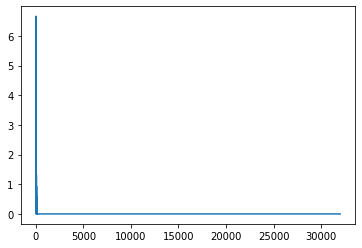

In [19]:
plt.plot(losses)

In [20]:
Yp = mlp2(c, v, b, w, X, identity)

print('Training')
print('MSE = ', mse_loss(X, Y, Yp))
print('RMSE = ', np.sqrt(mse_loss(X, Y, Yp)))

for i in range(4):
    print("{} {} | {} | {:.4f}".format( *X[i],  *Y[i], *Yp[i]))


Training
MSE =  6.162975822039155e-32
RMSE =  2.482534153247273e-16
0 0 | 0 | 0.0000
0 1 | 1 | 1.0000
1 0 | 1 | 1.0000
1 1 | 0 | -0.0000


## Stochastic Gradient Descend (SGD)

In [32]:
lr1 = 0.3
lr2 = 0.3

# Biases and weights (parameters)
c = np.random.normal(0, 1, K).reshape((K,1))
v = np.random.normal(0, 1, K*M).reshape((K,M))
b = np.random.normal(0, 2, M).reshape((M,1))
w = np.random.normal(0, 2, M*D).reshape((M,D))

print(c.shape)
print(v.shape)

nepochs = 8000

oact=identity
loss=mse_loss
disp=False

(1, 1)
(1, 8)


In [28]:
np.random.choice(5, 3, replace=False)

array([0, 4, 1])

In [33]:
#def train_mlp2(c, v, b, w, X, Y, lr1, lr2, nepochs, 
#               oact=identity, loss=mse_loss, disp=False):

if True:

  losses = []

  for i in range(nepochs):

      # X: N x D
      for n in np.random.choice(N, N, replace=False):

        xn = X[n,:].reshape((1,-1))
        yn = Y[n,:].reshape((1,-1))

        # Forward pass
        a = b.T + np.dot(xn, w.T)            # a: array N x M   ## Online
        z = sigmoid(a)                      # z: array N x M
        a2 = c.T + np.dot(z, v.T)           # a2: array N x K
        z2 = oact(a2)                       # z2: array N x K
        yhat = z2                           # yhat: array N x K

        # Backward pass
        delta2 = yhat - yn                   # delta2: array N x K  ## Online
        OneVec = np.ones(1).reshape((1,-1)) # OneVec: array 1 x 1   ## Online
        dLc = np.dot( OneVec, delta2 ).T    # dLc: array K x 1
        dLv = np.dot( z.T, delta2 ).T       # dLv: array K x M
        H = np.multiply(1 - z, z)           # H: array N x M
        delta1 = np.dot(delta2, v) * H      # delta1: array N x M
        dLb = np.dot( OneVec, delta1 ).T    # dLb: array M x 1
        dLw = np.dot( xn.T, delta1 ).T       # dLw: array M x D   ## Online

        lossi = loss(xn, yn, yhat)           ## Online
        
        if np.isnan(lossi):  
            print('Reach NaN. Terminated.')
            break

        losses.append(lossi)

        c -= dLc * lr2
        v -= dLv * lr2
        b -= dLb * lr1
        w -= dLw * lr1
      # end for n
      
      if disp:
        if i % 1000 == 0:
            print('mse = %.4f' % mse)

  # end for i

  #return c, v, b, w, losses

Text(0, 0.5, 'Loss[n]')

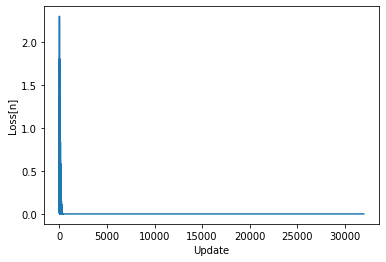

In [35]:
plt.plot(losses)
plt.xlabel('Update')
plt.ylabel('Loss[n]')

In [36]:
Yp = mlp2(c, v, b, w, X, identity)

print('Training')
print('MSE = ', mse_loss(X, Y, Yp))
print('RMSE = ', np.sqrt(mse_loss(X, Y, Yp)))

for i in range(4):
    print("{} {} | {} | {:.4f}".format( *X[i],  *Y[i], *Yp[i]))


Training
MSE =  2.465190328815662e-32
RMSE =  1.5700924586837752e-16
0 0 | 0 | 0.0000
0 1 | 1 | 1.0000
1 0 | 1 | 1.0000
1 1 | 0 | 0.0000
